## Aprendizaje no supervisado y preprocesamiento

La segunda familia de algoritmos de machine learning son los algoritmos de aprendizaje no supervisados. El aprendizaje no supervisado abarca todo tipo de algoritmos, donde no se conoce ningún resultado, no hay un profesor que instruya el algoritmo de aprendizaje. En el aprendizaje no supervisado, el algoritmo de aprendizaje solo muestra los datos de entrada y se le pide extraer el conocimiento de estos datos.

### Tipos de aprendizaje no supervisado

* Transformaciones no supervisados de un conjunto de datos son algoritmos que crean una nueva representación de los datos que podría ser más fácil de entender para los humanos u otros algoritmos de machine learning en comparación con la representación original de los datos. Una aplicación común de las transformaciones no supervisadas es la reducción de dimensionalidad, que requiere una representación en gran dimensión de los datos, que consta de muchas características y encuentra una nueva forma de representar esta información que resume las características esenciales con menos características. Una aplicación común para la reducción de dimensionalidad es la reducción a dos dimensiones con fines de visualización.
Otra aplicación para transformaciones no supervisadas es encontrar las partes o componentes que "componen" los datos. Un ejemplo de esto es la extracción de temas en colecciones de documentos de texto. Aquí, la tarea es encontrar los temas desconocidos de los que se habla en cada documento y aprender qué temas aparecen en cada documento. Esto puede ser útil para rastrear la discusión de temas como las elecciones, el control de armas o las estrellas del pop en las redes sociales.

* Los algoritmos de agrupamiento (clustering), por otro lado, dividen los datos en distintos grupos de elementos similares. Considere el ejemplo de subir fotos a un sitio de redes sociales. Para permitirle organizar sus imágenes, es posible que el sitio quiera agrupar imágenes que muestren a la misma persona. Sin embargo, el sitio no sabe qué imágenes muestran a quién y no sabe cuántas personas diferentes aparecen en su colección de fotos. Un enfoque sensato sería extraer todas las caras y dividirlos en grupos de caras que se vean similares. Con suerte, estos corresponden a la misma persona y las imágenes se pueden agrupar para ti.


### Preprocesamiento y escalado

Algunos algoritmos, como redes neuronales y SVM, son muy sensibles a la escala de los datos. Por lo tanto, una práctica común es ajustar las características para que la representación de datos sea más adecuada para estos algoritmos. A menudo, se trata de un simple reajuste y desplazamiento por característica de los datos.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
cm2 = ListedColormap(['#0000aa', '#ff2020'])
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler)



def dibuja_escalado():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    principal_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    principal_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    principal_ax.set_xlim(-maxx + 1, maxx + 1)
    principal_ax.set_ylim(-maxy + 1, maxy + 1)
    principal_ax.set_title("Dato original")
    otros_axes = [plt.subplot2grid((2, 4), (i, j))
                  for j in range(2, 4) for i in range(2)]

    for ax, scaler in zip(otros_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    otros_axes.append(principal_ax)

    for ax in otros_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

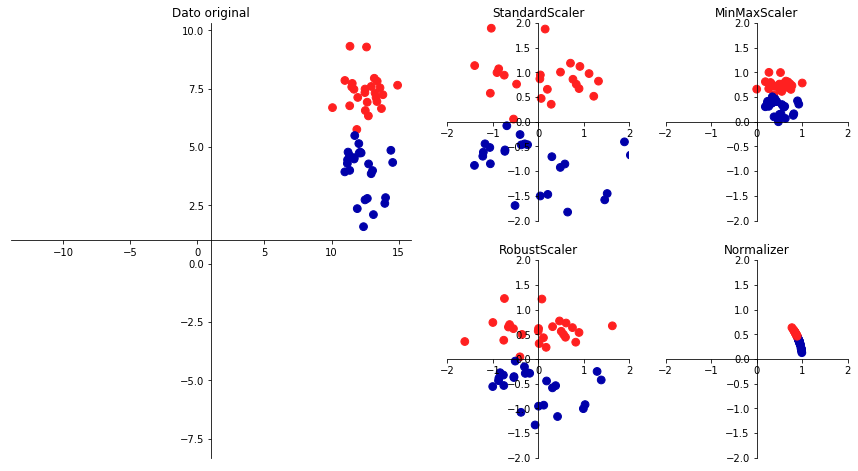

In [2]:
dibuja_escalado()

### Diferentes de procesamiento

El primer gráfico de la anterior figura muestra un conjunto de datos de clasificación de dos clases artificiales con dos características. La primera característica (el valor del eje x) está entre 10 y 15. La segunda característica (el valor del eje y) está entre alrededor de 1 y 9.

Los siguientes cuatro gráficos muestran cuatro formas diferentes de transformar los datos que producen más rangos estándar. El `StandardScaler` en scikit-learn asegura que para cada característica la media es `0` y la varianza es `1`, lo que hace que todas las características tengan la misma magnitud. Sin embargo, esta escala no garantiza ningún valor mínimo y máximo particular para las características.

El `RobustScaler` funciona de manera similar al `StandardScaler`, ya que garantiza propiedades estadísticas para cada característica que garantiza que estén en la misma escala. Sin embargo, el RobustScaler usa la mediana y los cuartiles,  en lugar de la media y la varianza. Esto hace que el RobustScaler ignore los puntos de datos que son muy diferentes del resto (como los errores de medición).

Estos puntos de datos extraños también se llaman valores atípicos (`outliers`) y pueden generar problemas para otras técnicas de escalado.

El `MinMaxScaler`, por otro lado, cambia los datos de manera que todas las características estén exactamente entre `0` y `1`. Para el conjunto de datos bidimensional, esto significa que todos los datos están contenidos dentro del rectángulo creado por el eje `x` entre `0 ` y `1` y el eje `y` entre `0` y `1`.


Finalmente, `Normalizer` hace un tipo de reajuste muy diferente. Escala cada punto de datos de modo que el vector de características tenga una longitud euclidiana de `1`. En otras palabras, proyecta un punto de datos en el círculo (o esfera, en el caso de dimensiones más altas) con un radio de `1`.  Esto significa que todos los datos el punto se escala por un número diferente (por el inverso de su longitud). Esta normalización a menudo se usa cuando solo importa la dirección (o ángulo) de los datos, no la longitud del vector de características.

### Aplicando transformaciones de datos

Ahora que hemos visto los diferentes tipos de transformaciones, apliquemos el uso de scikit-learn. Utilizaremos el conjunto de datos `cancer`. Los métodos de preprocesamiento como los escaladores generalmente se aplican antes de aplicar un algoritmo de machine learning supervisado. 

Como ejemplo, digamos que queremos aplicar el kernel SVM (SVC) al conjunto de datos de `cancer`  y usar `MinMaxScaler` para preprocesar los datos. Comenzamos cargando nuestro conjunto de datos y dividiéndolo en un conjunto de entrenamiento y un conjunto de prueba (necesitamos conjuntos de prueba y entrenamiento por separado para evaluar el modelo supervisado que crearemos después del preprocesamiento):

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_entrenamiento.shape)
print(X_prueba.shape)

(426, 30)
(143, 30)


El conjunto de datos contiene `569` puntos de datos, cada uno representado por `30` medidas. Dividimos el conjunto de datos en `426` muestras para el conjunto de entrenamiento y `143` muestras para el conjunto de prueba.
Al igual que con los modelos supervisados que construimos anteriormente, primero importamos la clase que implementa el preprocesamiento y luego la instanciamos:


In [6]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()

Luego ajustamos el escalador usando el método `fit`, aplicado a los datos de entrenamiento. Para el `MinMaxScaler`, el método `fit` calcula el valor mínimo y máximo de cada característica en el conjunto de entrenamiento. 

A diferencia de los clasificadores y regresores en el  aprendizaje supervisado, el escalador solo se proporciona con los datos `(X_entrenamento)` cuando se llama a `fit` y `y_entrenamiento` no se usa:

In [7]:
escalador.fit(X_entrenamiento)

MinMaxScaler(copy=True, feature_range=(0, 1))

Para aplicar la transformación que acabamos de aprender, es decir, para escalar los datos de entrenamiento, usamos el método `transform` del escalador. El método `transform` se usa en scikit-learn cada vez que un modelo devuelve una nueva representación de los datos:

In [21]:
# Transformacion de datos
X_entrenamiento_escalado = escalador.transform(X_entrenamiento)

# imprimimos las propiedades del conjunto de datos antes y después de escalar
print("dimension trasformada: {}".format(X_entrenamiento_escalado.shape))
print("minimo de las características antes de escalar: \n{}".format(X_entrenamiento.min(axis=0)))
print("maximo de las características antes de escalar:\n {}".format(X_entrenamiento.max(axis=0)))

print("minimo de las características despues de escalar:\n {}".format(X_entrenamiento_escalado.min(axis=0)))
print("maximo de las características despues de escalar:\n {}".format(X_entrenamiento_escalado.max(axis=0)))

dimension trasformada: (426, 30)
minimo de las características antes de escalar: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
maximo de las características antes de escalar:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
minimo de las características despues de escalar:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximo de las características despues de escalar:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

Los datos transformados tienen la misma forma que los datos originales: las características simplemente se cambian y escalan. Puede ver que todas las funciones están ahora entre 0 y 1.
Para aplicar SVM a los datos escalados, también necesitamos transformar el conjunto de prueba. Esto se hace nuevamente llamando al método `transform`, esta vez en `X_prueba`:

In [16]:
X_prueba_escalado = escalador.transform(X_prueba)

# imprimimos las propiedades del conjunto de prueba  después de escalar
print("minimo de las características despues de escalar:\n {}".format(X_prueba_escalado.min(axis=0)))
print("maximo de las características despues de escalar:\n {}".format(X_prueba_escalado.max(axis=0)))

minimo de las características despues de escalar:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
maximo de las características despues de escalar:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Tal vez de manera algo sorprendente, se puede ver que para el conjunto de prueba, después del escalado, el mínimo y el máximo no son 0 y 1. Algunas de las características están incluso fuera del rango `0-1`.
La explicación es que el `MinMaxScaler` (y todos los demás escaladores) siempre aplica exactamente la misma transformación al entrenamiento y al conjunto de prueba. Esto significa que el método`transform` siempre resta el mínimo del conjunto de entrenamiento y se divide por el rango del conjunto de entrenamiento, que puede ser diferente del mínimo y el rango para el conjunto de prueba.


### Escalar el entrenamiento y los datos de prueba de la misma manera

Es importante aplicar exactamente la misma transformación al conjunto de entrenamiento y al conjunto de pruebas para que el modelo supervisado funcione en el conjunto de prueba. El siguiente ejemplo  ilustra lo que sucedería si usáramos el mínimo y el rango del conjunto de prueba:


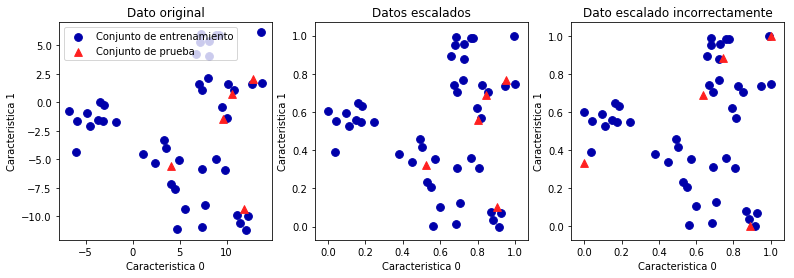

In [22]:
from sklearn.datasets import make_blobs

# construimos el conjunto artificial
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# dividimos este conjunto en un conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba = train_test_split(X, random_state=5, test_size=.1)

# dibujamos el conjunto de entrenamiento y de prueba
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_entrenamiento[:, 0], X_entrenamiento[:, 1], c=cm2(0), label="Conjunto de entrenamiento", s=60)
axes[0].scatter(X_prueba[:, 0], X_prueba[:, 1], marker='^', c=cm2(1), label="Conjunto de prueba", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Dato original")

# escalamos los datos usando MinMaxScaler
escalador = MinMaxScaler()
escalador.fit(X_entrenamiento)
X_entrenamiento_escalado = escalador.transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

# visualizamos los datos correctamente escalados

axes[1].scatter(X_entrenamiento_escalado[:, 0], X_entrenamiento_escalado[:, 1],c=cm2(0), label="Conjunto de entrenamiento", s=60)
axes[1].scatter(X_prueba_escalado[:, 0], X_prueba_escalado[:, 1], marker='^',c=cm2(1), label="Conjunto de prueba", s=60)
axes[1].set_title("Datos escalados")

# cambiamos la escala del conjunto de prueba por separado para que el conjunto de prueba min sea 0 
# y el conjunto de prueba máx  sea 1. No recomendable

escalador_prueba = MinMaxScaler()
escalador_prueba.fit(X_prueba)
X_prueba_escalado_incorrecto = escalador_prueba.transform(X_prueba)

# visualizamos los datos escalados de manera incorrecta

axes[2].scatter(X_entrenamiento_escalado[:, 0], X_entrenamiento_escalado[:, 1], c=cm2(0), label="Conjunto de entrenamiento", s=60)
axes[2].scatter(X_prueba_escalado_incorrecto[:, 0], X_prueba_escalado_incorrecto[:, 1], 
                marker='^', c=cm2(1), label="Conjunto de prueba", s=60)
axes[2].set_title("Dato escalado incorrectamente")

for ax in axes:
    ax.set_xlabel("Caracteristica 0")
    ax.set_ylabel("Caracteristica 1")

El primer panel es un conjunto de datos bidimensionales sin escalar, con el conjunto de entrenamiento mostrado como círculos y el conjunto de prueba mostrado como triángulos. El segundo panel tiene los mismos datos, pero se escalan con `MinMaxScaler`. Aquí, aplicamos   la función `fit` al conjunto de entrenamiento y luego `transform` a los conjuntos de entrenamiento y prueba. 

Se puede ver que el conjunto de datos en el segundo panel es idéntico al primero; solo los valores en los ejes han cambiado. Ahora todas las funciones están entre 0 y 1. También puede ver que los valores de característica mínimo y máximo para los datos de prueba (los triángulos) no son 0 y 1.

El tercer panel muestra lo que sucedería si escalamos el conjunto de entrenamiento y el conjunto de prueba por separado. En este caso, los valores de característica mínimo y máximo para el entrenamiento y el conjunto de prueba son 0 y 1. En este caso el conjunto de datos se ve diferente. Los puntos de prueba se movieron incongruentemente al conjunto de entrenamiento, ya que se escalaron de forma diferente. 

Una forma de pensar sobre esto, es imaginar que el conjunto de pruebas es un solo punto. No hay forma de escalar correctamente un solo punto para cumplir los requisitos mínimos y máximos del MinMaxScaler. Pero el tamaño del conjunto de prueba no debe cambiar su procesamiento.

### El efecto del preprocesamiento en el aprendizaje supervisado

Utilicemos el conjunto de datos `cancer` y veamos el efecto de `MinMaxScaler` en el aprendizaje del SVC. Primero, ajustemos el SVC en los datos originales nuevamente para comparar:

In [23]:
from sklearn.svm import SVC

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_entrenamiento, y_entrenamiento)
print("Precision del conjunto de prueba: {:.2f}".format(svm.score(X_prueba, y_prueba)))

Precision del conjunto de prueba: 0.63


Ahora, escalemos los datos usando `MinMaxScaler` antes de ajustar el SVC:

In [25]:
# preprocesamiento con  escalado  0-1
escalador = MinMaxScaler()
escalador.fit(X_entrenamiento)

X_entrenamiento_escalado = escalador.transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

# aprendiendo una SVM en los datos de entrenamiento escalados
svm.fit(X_entrenamiento_escalado, y_entrenamiento)

# puntuación en el conjunto de prueba escalado
print("Precision en el conjunto de prueba escalado: {:.2f}".format(svm.score(X_prueba_escalado, y_prueba)))

Precision en el conjunto de prueba escalado: 0.97


Se puede reemplazar fácilmente un algoritmo de preprocesamiento por otro cambiando la clase que utiliza, ya que todas las clases de preprocesamiento tienen la misma interfaz, que consiste en los métodos `fit` y `transformation`:

In [26]:
# preprocesamiento usando una  escala de media cero  y varianza 1
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(X_entrenamiento)

X_entrenamiento_escalado = escalador.transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

# aprendiendo una SVM en los datos de entrenamiento escalados
svm.fit(X_entrenamiento_escalado, y_entrenamiento)

# puntuación en el conjunto de prueba escalado
print("Precision en el conjunto de prueba escalado: {:.2f}".format(svm.score(X_prueba_escalado, y_prueba)))


Precision en el conjunto de prueba escalado: 0.96
